# UMBC DATA606 Capstone –  Predicting Student Startup Success

**Project Title:**  Predicting Student Startup Success Using Team, Innovation, and Support Factors

**GitHub Repository:** https://github.com/Nirvika12/UMBC-DATA606-Capstone

---

## Background

This project aims to predict the success of student-led startup projects by leveraging a dataset containing key structural, strategic, and support-related factors. The dataset includes 2,100 student startup initiatives from 40 academic institutions spanning 2019–2023. By understanding which internal factors—such as team experience, innovation level, funding, mentorship, and incubation—drive startup success, the study seeks to develop predictive models that can guide educational institutions and incubators in nurturing effective entrepreneurial ventures.


### Research Questions:

1. Which project-related factors best predict the success of student-led startups?

2. How do team characteristics (size, experience) influence project outcomes?

3. What role do innovation and technology maturity play in predicting success?

4. How impactful are institutional supports like mentorship and incubation on startup outcomes?

5. Can predictive models built on these factors reliably classify successful vs unsuccessful projects

---

Kaggle dataset: [Student Startup Success Dataset](https://www.kaggle.com/datasets/ziya07/student-startup-success-dataset/data)



## 1: Importing Libraries


In [37]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import numpy as np
import plotly.figure_factory as ff


## 2: Reading and Understanding Data

In [38]:
df = pd.read_csv('/Users/nirvikarajendra/Downloads/student_startup_success_dataset-df.csv')

In [39]:
print("Initial data shape:", df.shape)
df.head()

Initial data shape: (2100, 16)


,project_id,institution_name,institution_type,project_domain,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year,success_label
0,P0001,Institution_39,Non-technical,AgriTech,3,1.35,0.75,48336.75,1,1,3,3,0.86,4,2023,1
1,P0002,Institution_29,Technical,FinTech,4,1.57,0.38,30601.34,0,0,5,0,0.39,5,2023,0
2,P0003,Institution_15,Non-technical,AgriTech,3,2.19,0.61,37712.58,1,1,1,0,0.38,2,2019,1
3,P0004,Institution_8,Private,GreenTech,7,0.72,0.98,46881.00,1,1,5,1,0.69,5,2021,1
4,P0005,Institution_21,Public,HealthTech,7,2.64,0.33,29988.37,0,0,4,2,0.85,2,2020,0


In [40]:
print("\nColumns and Data Types:")
print(df.dtypes)


Columns and Data Types:
project_id                 object
institution_name           object
institution_type           object
project_domain             object
team_size                   int64
avg_team_experience       float64
innovation_score          float64
funding_amount_usd        float64
mentorship_support          int64
incubation_support          int64
market_readiness_level      int64
competition_awards          int64
business_model_score      float64
technology_maturity         int64
year                        int64
success_label               int64
dtype: object


In [41]:
print("\nUnique Values for each Column:")
df.nunique()


Unique Values for each Column:


project_id                2100
institution_name            40
institution_type             4
project_domain               5
team_size                    6
avg_team_experience        351
innovation_score            71
funding_amount_usd        2100
mentorship_support           2
incubation_support           2
market_readiness_level       5
competition_awards           5
business_model_score        81
technology_maturity          5
year                         5
success_label                2
dtype: int64

In [42]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


## 3: Handling Missing Values and Standardizing Values

In [43]:
df.isnull().sum()

project_id                0
institution_name          0
institution_type          0
project_domain            0
team_size                 0
avg_team_experience       0
innovation_score          0
funding_amount_usd        0
mentorship_support        0
incubation_support        0
market_readiness_level    0
competition_awards        0
business_model_score      0
technology_maturity       0
year                      0
success_label             0
dtype: int64

> No missing values are present in any of the columns.

In [44]:
# Standardize categorical text fields
cat_cols = ['institution_name', 'institution_type', 'project_domain']

for col in cat_cols:
    df[col] = df[col].str.strip().str.lower().str.replace(' ', '_')


In [45]:
# Replace short domain names with their standardized full forms
domain_map = {
    'agritech': 'agricultural_technology',
    'fintech': 'financial_technology',
    'greentech': 'green_environmental_technology',
    'healthtech': 'healthcare_technology',
    'edtech': 'educational_technology'
}

df['project_domain'] = df['project_domain'].map(domain_map)


In [46]:
df[cat_cols].head()

,institution_name,institution_type,project_domain
0,institution_39,non-technical,agricultural_technology
1,institution_29,technical,financial_technology
2,institution_15,non-technical,agricultural_technology
3,institution_8,private,green_environmental_technology
4,institution_21,public,healthcare_technology


In [47]:
#Descriptive Statistics Summary
df.describe()

,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year,success_label
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,4.472381,2.271671,0.650124,25372.473505,0.494762,0.506190,2.962381,1.947143,0.598343,3.062381,2021.062857,0.419524
std,1.709403,1.004748,0.202946,14141.821776,0.500092,0.500081,1.427963,1.391654,0.233342,1.417045,1.460567,0.493599
min,2.000000,0.500000,0.300000,1050.090000,0.000000,0.000000,1.000000,0.000000,0.200000,1.000000,2019.000000,0.000000
25%,3.000000,1.437500,0.480000,13532.472500,0.000000,0.000000,2.000000,1.000000,0.390000,2.000000,2020.000000,0.000000
50%,4.000000,2.290000,0.650000,25216.430000,0.000000,1.000000,3.000000,2.000000,0.600000,3.000000,2021.000000,0.000000
75%,6.000000,3.120000,0.830000,37403.670000,1.000000,1.000000,4.000000,3.000000,0.800000,4.000000,2022.000000,1.000000
max,7.000000,4.000000,1.000000,49982.150000,1.000000,1.000000,5.000000,4.000000,1.000000,5.000000,2023.000000,1.000000


> Based on the descriptive statistics, all numerical features fall within reasonable ranges without extreme deviations. The maximum values are close to their respective upper quartiles, indicating no significant outliers.

> The dataset includes 2,100 startup projects. Team sizes range from 2 to 7 members (mean ≈ 4.5).
Average team experience is 2.3 years, while the mean innovation score is 0.65 on a 0–1 scale.
Funding values range from approximately `$1,000 to $50,000`, with an average of $25,372, indicating moderate funding variability.
Around half of the projects received mentorship and incubation support.
The success rate is 41.9%, suggesting a balanced target distribution suitable for classification modeling.

## 4: Exploratory Data Analysis - EDA

In [48]:
df.head()

,project_id,institution_name,institution_type,project_domain,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year,success_label
0,P0001,institution_39,non-technical,agricultural_technology,3,1.35,0.75,48336.75,1,1,3,3,0.86,4,2023,1
1,P0002,institution_29,technical,financial_technology,4,1.57,0.38,30601.34,0,0,5,0,0.39,5,2023,0
2,P0003,institution_15,non-technical,agricultural_technology,3,2.19,0.61,37712.58,1,1,1,0,0.38,2,2019,1
3,P0004,institution_8,private,green_environmental_technology,7,0.72,0.98,46881.00,1,1,5,1,0.69,5,2021,1
4,P0005,institution_21,public,healthcare_technology,7,2.64,0.33,29988.37,0,0,4,2,0.85,2,2020,0


### 4.1: Feature Description

| **Group Name**                            | **Columns**                                                           | **What They Represent**                                                           |
| ----------------------------------------- | --------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- |
|  **Identifiers**                        | `project_id`, `institution_name`                                      | Uniquely identify projects and institutions.                  |
|  **Institution Attributes**             | `institution_type`, `project_domain`                                  | Describe the nature and focus of the institution/project. |
|  **Team Characteristics**               | `team_size`, `avg_team_experience`                                    | Capture human/team factors that may influence project success.                                 |
|  **Performance & Innovation Metrics**   | `innovation_score`, `business_model_score`                            | Reflect creativity, business soundness, or project quality.                                    |
|  **Financial & Support Features**       | `funding_amount_usd`, `mentorship_support`, `incubation_support`      | Represent resource availability or institutional backing.                                      |
|  **Readiness & Achievement Indicators** | `market_readiness_level`, `technology_maturity`, `competition_awards` | Show progress or recognition levels.                                                           |
|  **Time Dimension**                     | `year`                                                                | Enables trend analysis over time.                                                              |
|  **Target Variable**                    | `success_label`                                                       | The outcome variable                                        |


In [49]:
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns

print("Categorical variables:")
print(categorical_vars)

print("\nNumerical variables:")
print(numerical_vars)

Categorical variables:
Index(['project_id', 'institution_name', 'institution_type', 'project_domain'], dtype='object')

Numerical variables:
Index(['team_size', 'avg_team_experience', 'innovation_score',
       'funding_amount_usd', 'mentorship_support', 'incubation_support',
       'market_readiness_level', 'competition_awards', 'business_model_score',
       'technology_maturity', 'year', 'success_label'],
      dtype='object')


### 4.2: Visual Data Exploration

Startup Success Distribution:
success_label
0    58.05%
1    41.95%
Name: proportion, dtype: object


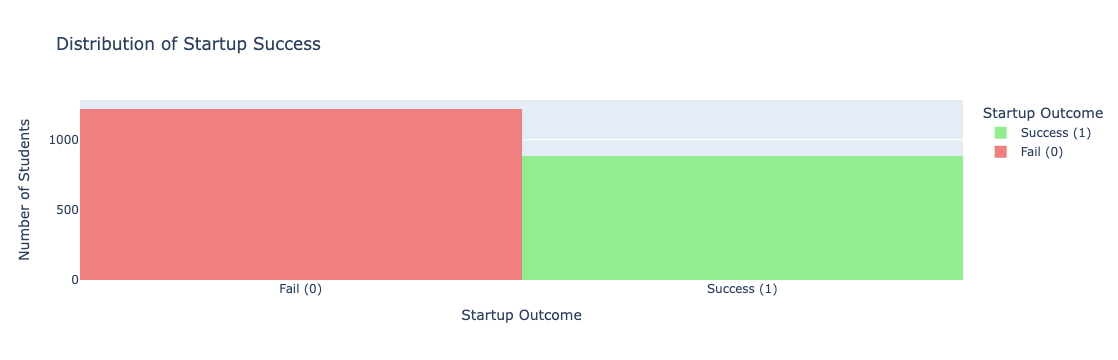

In [50]:
percentages = df['success_label'].value_counts(normalize=True) * 100
print("Startup Success Distribution:")
print(percentages.round(2).astype(str) + '%')

fig = px.histogram(df, x='success_label', color='success_label',
                   title='Distribution of Startup Success',
                   labels={'success_label': 'Startup Outcome', 'count': 'Number of Students'},
                   color_discrete_map={0: 'lightcoral', 1: 'lightgreen'})  

fig.for_each_trace(lambda t: t.update(
    name='Success (1)' if t.name == '1' else 'Fail (0)',
    legendgroup='Success (1)' if t.name == '1' else 'Fail (0)'
))

fig.update_layout(
    xaxis_title="Startup Outcome",
    yaxis_title="Number of Students",
    xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Fail (0)', 'Success (1)'])
)

fig.show()

> **Summary:**  
About **42%** of student startups succeeded, while **58%** failed.  
This indicates a slightly higher proportion of unsuccessful ventures but still a fairly balanced distribution, suitable for building reliable classification models.


success_label        0    1   All
institution_type                 
non-technical      300  249   549
private            304  193   497
public             319  227   546
technical          296  212   508
All               1219  881  2100


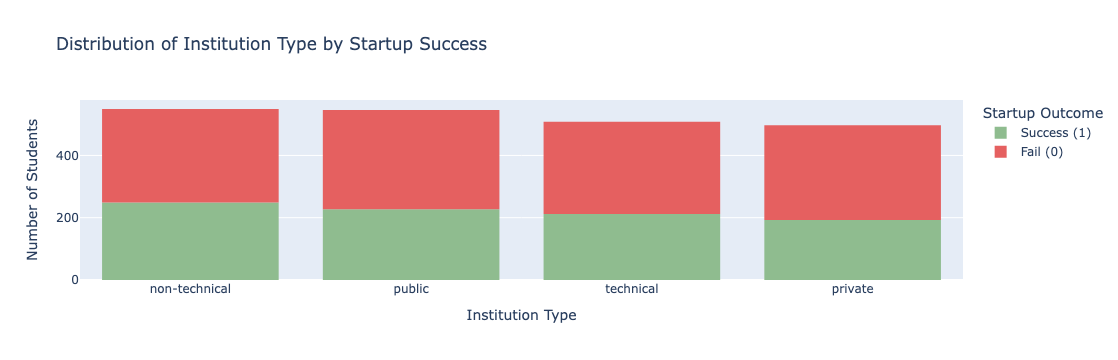

In [51]:
# Histogram showing the distribution of startup success across institution types
institute_type_success = pd.crosstab(df['institution_type'], df['success_label'], margins=True)
print(institute_type_success)

sorted_institution_types = df['institution_type'].value_counts().index

fig1 = px.histogram( df, x='institution_type', color='success_label',
                    title='Distribution of Institution Type by Startup Success',
                    labels={
                        'institution_type': 'Institution Type',
                        'success_label': 'Startup Outcome',
                        'count': 'Number of Students'
                    },
    color_discrete_map={
        0: '#e56060',   # red for fail
        1: '#8fbc8f'    # green for success
    },
    category_orders={'institution_type': sorted_institution_types}
)

fig1.for_each_trace(lambda t: t.update(
    name='Success (1)' if t.name == '1' else 'Fail (0)',
    legendgroup='Success (1)' if t.name == '1' else 'Fail (0)'
))

fig1.update_layout(
    xaxis_title="Institution Type",
    yaxis_title="Number of Students",
    legend_title="Startup Outcome"
)

fig1.show()


>**Summary:**  
All institution types show both successful and failed startups, with slightly more failures overall.  
Non-technical and public institutions have the highest participation, while success rates remain fairly consistent across types.


success_label                      0    1   All
project_domain                                 
agricultural_technology          265  174   439
educational_technology           229  178   407
financial_technology             247  178   425
green_environmental_technology   242  180   422
healthcare_technology            236  171   407
All                             1219  881  2100


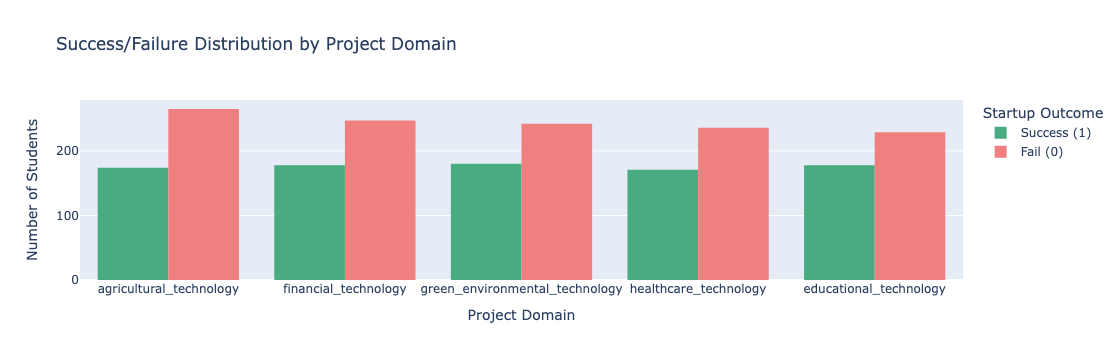

In [52]:
project_domain_success = pd.crosstab(df['project_domain'], df['success_label'], margins=True)
print(project_domain_success)
sorted_project_domains = df['project_domain'].value_counts().index

fig = px.histogram(df, 
                   x='project_domain', 
                   color='success_label',
                   title='Success/Failure Distribution by Project Domain',
                   labels={'project_domain': 'Project Domain', 
                           'success_label': 'Startup Outcome', 
                           'count': 'Number of Students'},
                   color_discrete_map={0: 'lightcoral', 1: '#49ab81'},
                   barmode='group',
                   category_orders={'project_domain': sorted_project_domains}) 

fig.for_each_trace(lambda t: t.update(
    name='Success (1)' if t.name == '1' else 'Fail (0)',
    legendgroup='Success (1)' if t.name == '1' else 'Fail (0)'
))

fig.update_layout(
    xaxis_title="Project Domain",
    yaxis_title="Number of Students",
    xaxis=dict(tickmode='array', tickvals=sorted_project_domains)
)

fig.show()

> **Summary:**  
All domains show both successful and failed startups, with failures slightly more frequent across every category.  
Agricultural, Financial, and Green Technology startups have the highest participation, while success rates remain similar across all domains.


In [53]:
df[numerical_vars].nunique()

team_size                    6
avg_team_experience        351
innovation_score            71
funding_amount_usd        2100
mentorship_support           2
incubation_support           2
market_readiness_level       5
competition_awards           5
business_model_score        81
technology_maturity          5
year                         5
success_label                2
dtype: int64

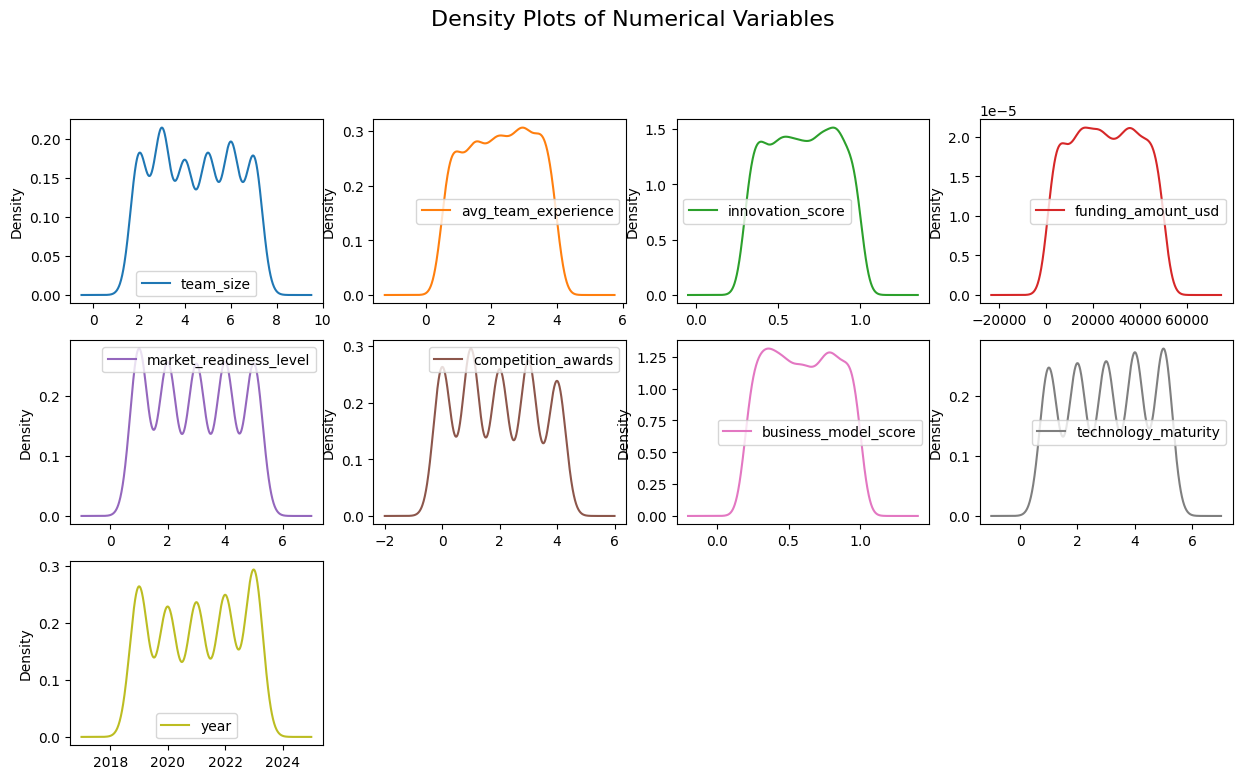

In [54]:
# Density distributions for all numerical variables with continuous values
numerical_vars_filtered = [col for col in numerical_vars if df[col].nunique() > 2]

df[numerical_vars_filtered].plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 11))
plt.suptitle("Density Plots of Numerical Variables", fontsize=16)
plt.show()

>**Summary:**  
Most numerical variables show approximately normal or slightly right-skewed distributions,  
indicating moderate variability across features such as funding, team experience, and innovation score.


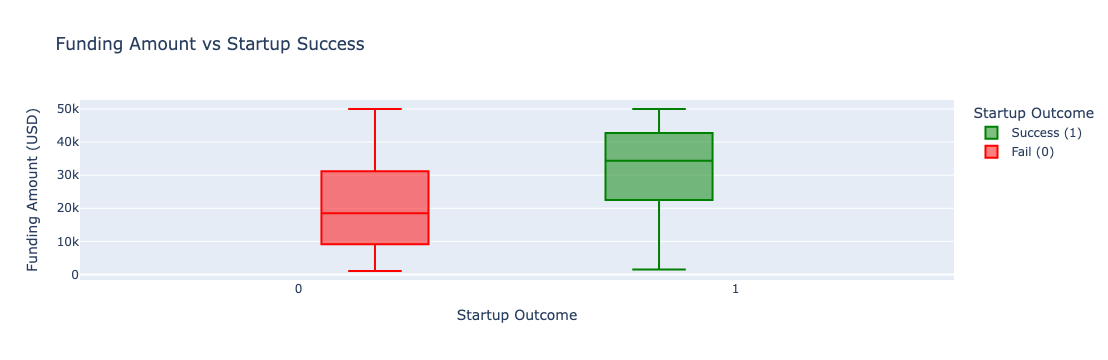

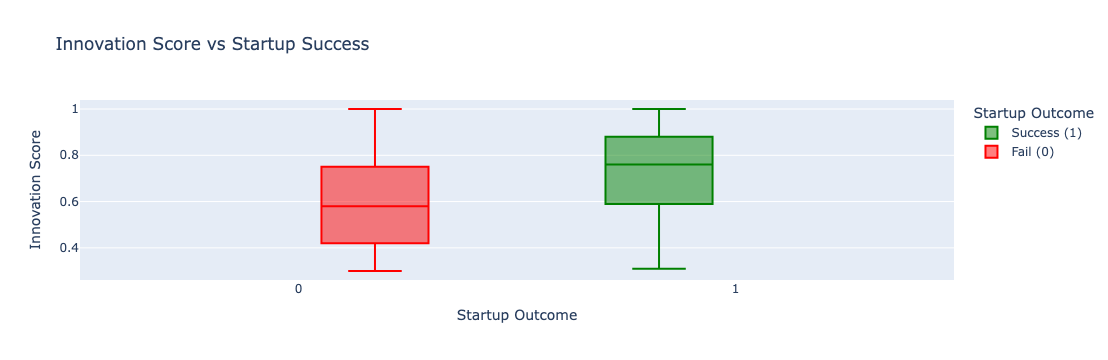

In [70]:
# Box Plot 1: Funding Amount vs Startup Success
fig1 = px.box(df, x='success_label', y='funding_amount_usd',
              title='Funding Amount vs Startup Success',
              labels={'success_label': 'Startup Outcome', 'funding_amount_usd': 'Funding Amount (USD)'},
              color='success_label', 
              color_discrete_map={0: 'red', 1: 'green'},
              boxmode='group')  

fig1.for_each_trace(lambda t: t.update(
    name='Success (1)' if t.name == '1' else 'Fail (0)',
    legendgroup='Success (1)' if t.name == '1' else 'Fail (0)'
))
fig1.show()

# Box Plot 2: Innovation Score vs Startup Success
fig2 = px.box(df, x='success_label', y='innovation_score',
              title='Innovation Score vs Startup Success',
              labels={'success_label': 'Startup Outcome', 'innovation_score': 'Innovation Score'},
              color='success_label',
              color_discrete_map={0: 'red', 1: 'green'},
              boxmode='group') 
fig2.for_each_trace(lambda t: t.update(
    name='Success (1)' if t.name == '1' else 'Fail (0)',
    legendgroup='Success (1)' if t.name == '1' else 'Fail (0)'
))
fig2.show()

>**Summary:**  
Successful startups generally received higher funding and demonstrated higher innovation scores than failed ones.  
This suggests both funding availability and innovative capability play significant roles in determining startup outcomes.


                count      mean       std  min    25%   50%    75%  max
success_label                                                          
0              1219.0  2.242847  0.998528  0.5  1.425  2.25  3.075  4.0
1               881.0  2.311555  1.012505  0.5  1.450  2.34  3.170  4.0


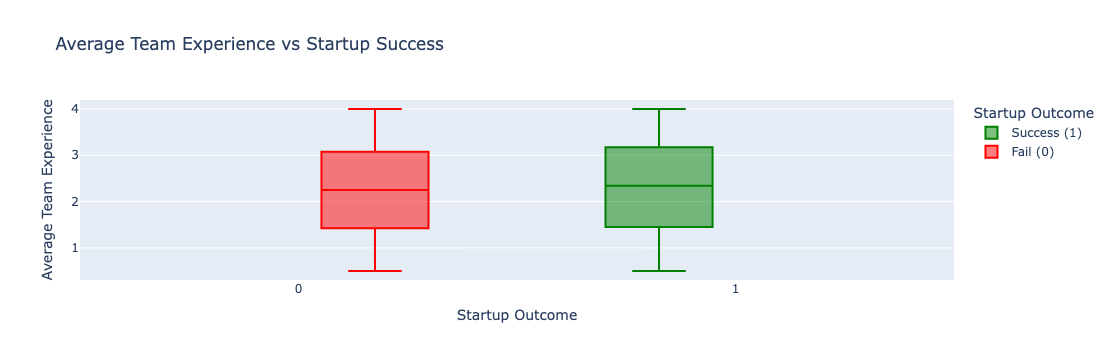

In [71]:
summary_data = df.groupby('success_label')['avg_team_experience'].describe()
print(summary_data)

fig3 = px.box(df, x='success_label', y='avg_team_experience',
              title='Average Team Experience vs Startup Success',
              labels={'success_label': 'Startup Outcome', 'avg_team_experience': 'Average Team Experience'},
              color='success_label', 
              color_discrete_map={0: 'red', 1: 'green'},
              boxmode='group')  
fig3.for_each_trace(lambda t: t.update(
    name='Success (1)' if t.name == '1' else 'Fail (0)',
    legendgroup='Success (1)' if t.name == '1' else 'Fail (0)'
))
fig3.show()

>**Summary:**  
>1. The box plot compares the average team experience between successful and failed startups.
>2. Successful startups (green) have a slightly higher mean team experience of 2.31 years, compared to 2.24 years for failed startups (red).
>3. The median experience for successful startups is 2.34 years, while for failed ones it is 2.25 years.
>4. Both groups show similar variability (standard deviation ≈ 1.0), indicating that experience levels vary widely across teams regardless of outcome.

> While the difference is modest, the trend suggests that teams with slightly higher average experience tend to achieve better startup outcomes. Experienced teams may be more adept at strategic decision-making and handling startup challenges effectively.

                count      mean       std  min   25%   50%   75%  max
success_label                                                        
0              1219.0  0.550911  0.226348  0.2  0.35  0.52  0.73  1.0
1               881.0  0.663973  0.227004  0.2  0.47  0.70  0.86  1.0


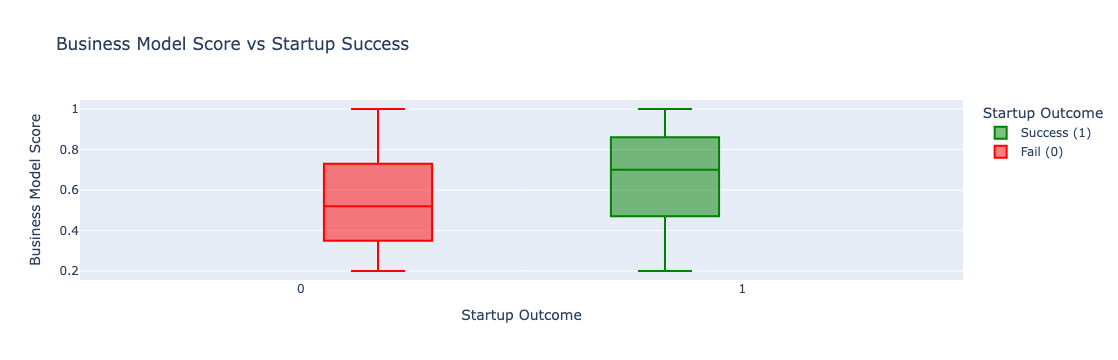

In [57]:
# Summary statistics of Business Model Score by success/failure
business_model_score_stat = df.groupby('success_label')['business_model_score'].describe()
print(business_model_score_stat)

fig4 = px.box(df, x='success_label', y='business_model_score',
              title='Business Model Score vs Startup Success',
              labels={'success_label': 'Startup Outcome', 'business_model_score': 'Business Model Score'},
              color='success_label', 
              color_discrete_map={0: 'red', 1: 'green'},
              boxmode='group')  
fig4.for_each_trace(lambda t: t.update(
    name='Success (1)' if t.name == '1' else 'Fail (0)',
    legendgroup='Success (1)' if t.name == '1' else 'Fail (0)'
))
fig4.show()

> The `business_model_score` represents a numerical rating (0–1) that measures how well-defined, feasible, and scalable each startup’s business model is.
> It captures how clearly the startup explains:
> 1. What problem it solves
> 2. Who the target customers are
> 3. How it generates revenue, and
> 4. How scalable or sustainable the model is.

**Summary:**  
>- The box plot compares business model scores between successful and failed startups.
>- Successful startups (green) have a higher mean business model score of 0.66, compared to 0.55 for failed startups (red).
>- The median score for successful startups is 0.70, while for failed startups it is 0.52, indicating a clear upward shift in performance.

> Both groups have similar variability (standard deviation ≈ 0.23), but the overall distribution shows that successful startups consistently achieve stronger business model evaluations.

> This suggests that startups with well-structured and viable business models are significantly more likely to succeed. A higher business model score reflects better planning, clearer value propositions, and sustainable revenue approaches — all of which contribute to greater success potential.


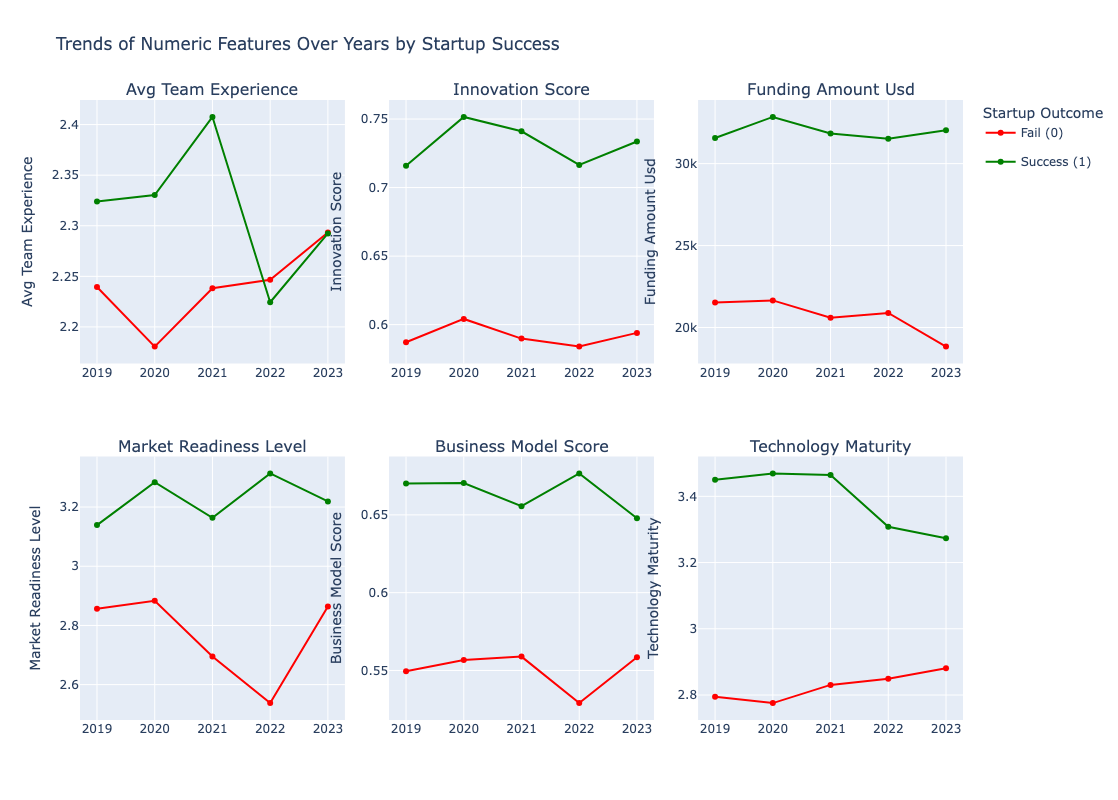

In [58]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define key numeric variables to visualize over time
numeric_vars = [
    'avg_team_experience', 'innovation_score', 'funding_amount_usd',
    'market_readiness_level', 'business_model_score', 'technology_maturity'
]

# Set number of columns per row for subplots
cols_per_row = 3
rows = (len(numeric_vars) + cols_per_row - 1) // cols_per_row

# Create subplots
fig = make_subplots(
    rows=rows, cols=cols_per_row,
    subplot_titles=[var.replace('_', ' ').title() for var in numeric_vars],
    horizontal_spacing=0.05, vertical_spacing=0.15
)

# Define visualization properties for success and failure
status_properties = {
    0: {'name': 'Fail (0)', 'color': 'red'},
    1: {'name': 'Success (1)', 'color': 'green'}
}

for i, col in enumerate(numeric_vars):
    avg_df = df.groupby(['year', 'success_label'], as_index=False)[col].mean()
    row = (i // cols_per_row) + 1
    col_pos = (i % cols_per_row) + 1

    for success_label, props in status_properties.items():
        # Show legend only once per label
        show_legend = (i == 0)

        fig.add_trace(
            go.Scatter(
                x=avg_df[avg_df['success_label'] == success_label]['year'],
                y=avg_df[avg_df['success_label'] == success_label][col],
                mode='lines+markers',
                name=props['name'],
                line=dict(color=props['color']),
                legendgroup=props['name'],
                showlegend=show_legend,
                hovertemplate=(
                    f"<b>Year:</b> %{{x}}<br>"
                    f"<b>{col.replace('_', ' ').title()}:</b> %{{y:.2f}}<extra></extra>"
                )
            ),
            row=row, col=col_pos
        )

    fig.update_yaxes(title_text=col.replace('_', ' ').title(), row=row, col=col_pos)

fig.update_layout(
    height=400 * rows,
    width=350 * cols_per_row,
    title_text='Trends of Numeric Features Over Years by Startup Success',
    legend_title="Startup Outcome",
    showlegend=True,
)

fig.show()


>**Summary:**  
The multi-panel line plot shows yearly trends of key numeric features for successful and failed startups (2019–2023).  
Successful startups consistently outperform failed ones across most metrics, including innovation score, business model score, and technology maturity.  
While both groups exhibit gradual improvement over time, successful ventures maintain higher averages, reflecting stronger growth and resource utilization patterns.


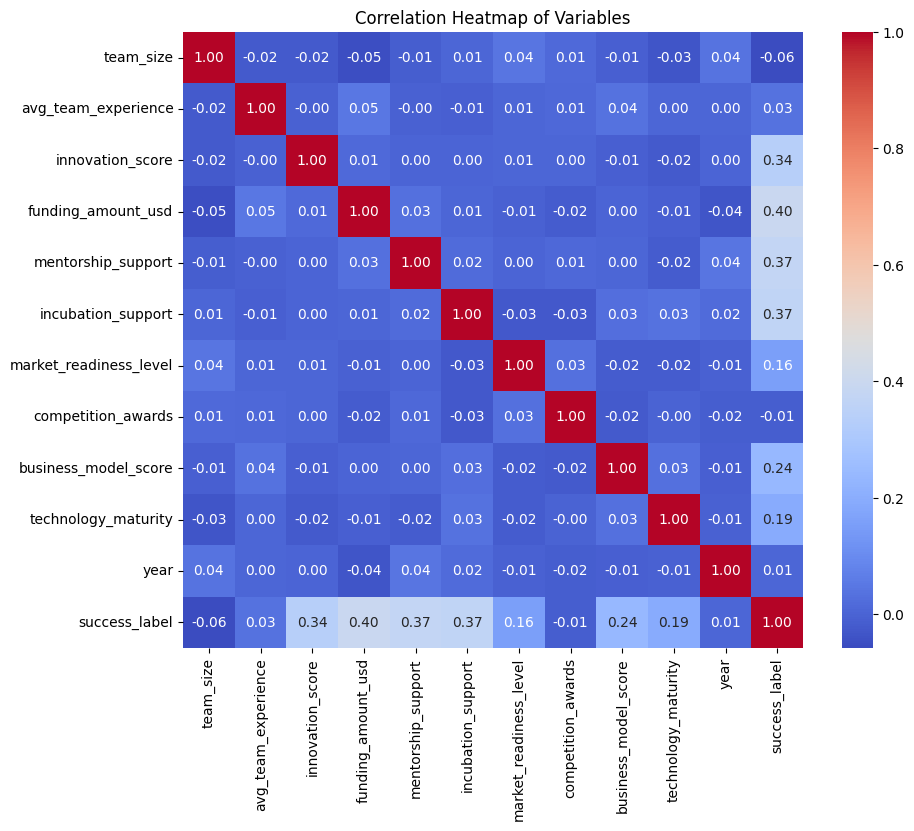

In [59]:
# Compute the correlation matrix
correlation_matrix = df[numerical_vars].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

>**Summary:**  
The correlation matrix shows that startup success has the strongest positive relationships with **funding amount (0.4)**, **innovation score (0.34)**, **business model score (0.24)**, and **technology maturity (0.19)**.  
Moderate positive correlations are also seen with **mentorship support (0.37)** and **incubation support (0.37)**, emphasizing the importance of institutional backing.  
Team size and experience show very weak relationships with success, suggesting that financial, strategic, and support factors play a more critical role than team composition alone.


In [60]:
df[numerical_vars].corr()

,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year,success_label
team_size,1.000000,-0.023741,-0.021537,-0.050069,-0.014938,0.006052,0.043391,0.013905,-0.011187,-0.033019,0.040958,-0.057688
avg_team_experience,-0.023741,1.000000,-0.004423,0.049135,-0.004652,-0.009507,0.008256,0.009729,0.036531,0.004374,0.004558,0.033754
innovation_score,-0.021537,-0.004423,1.000000,0.013571,0.002964,0.002387,0.006575,0.004932,-0.009575,-0.021165,0.001710,0.338862
funding_amount_usd,-0.050069,0.049135,0.013571,1.000000,0.029428,0.007895,-0.006947,-0.017449,0.003527,-0.011184,-0.036803,0.395257
mentorship_support,-0.014938,-0.004652,0.002964,0.029428,1.000000,0.019180,0.001392,0.010213,0.004335,-0.019371,0.044152,0.372717
incubation_support,0.006052,-0.009507,0.002387,0.007895,0.019180,1.000000,-0.028028,-0.025885,0.028586,0.034078,0.018383,0.366803
market_readiness_level,0.043391,0.008256,0.006575,-0.006947,0.001392,-0.028028,1.000000,0.030165,-0.020190,-0.016733,-0.006404,0.156234
competition_awards,0.013905,0.009729,0.004932,-0.017449,0.010213,-0.025885,0.030165,1.000000,-0.024448,-0.000501,-0.015709,-0.014171
business_model_score,-0.011187,0.036531,-0.009575,0.003527,0.004335,0.028586,-0.020190,-0.024448,1.000000,0.029720,-0.010430,0.239166
technology_maturity,-0.033019,0.004374,-0.021165,-0.011184,-0.019371,0.034078,-0.016733,-0.000501,0.029720,1.000000,-0.006269,0.194151


### 4.3: Key Descriptive Insights : Factors Influencing Project Success

#### 1. Descriptive Statistics for Failed Projects

In [61]:
df_fail = df[df['success_label'] == 0]

desc_fail = df_fail.drop(columns=['success_label']).describe().round(2)
desc_fail

,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year
count,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00
mean,4.56,2.24,0.59,20621.67,0.34,0.35,2.77,1.96,0.55,2.83,2021.05
std,1.70,1.00,0.20,13217.39,0.47,0.48,1.40,1.39,0.23,1.40,1.46
min,2.00,0.50,0.30,1050.09,0.00,0.00,1.00,0.00,0.20,1.00,2019.00
25%,3.00,1.42,0.42,9141.50,0.00,0.00,1.00,1.00,0.35,2.00,2020.00
50%,5.00,2.25,0.58,18456.40,0.00,0.00,3.00,2.00,0.52,3.00,2021.00
75%,6.00,3.08,0.75,31157.12,1.00,1.00,4.00,3.00,0.73,4.00,2022.00
max,7.00,4.00,1.00,49982.15,1.00,1.00,5.00,4.00,1.00,5.00,2023.00


>  Most failed projects had a team size around 5, moderate innovation score (0.58), and average funding of 20,621 usd. Funding varies widely, with the highest-funded failed project receiving nearly $50,000. Failed projects are distributed across 2019–2023, with many receiving low mentorship and incubation support.

#### 2. Descriptive Statistics for Successful Projects

In [62]:
df_success = df[df['success_label'] == 1]

# Describe successful projects
desc_success = df_success.drop(columns=['success_label']).describe().round(2)
desc_success

,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year
count,881.00,881.00,881.00,881.00,881.00,881.00,881.00,881.00,881.00,881.00,881.00
mean,4.36,2.31,0.73,31945.95,0.71,0.72,3.22,1.92,0.66,3.39,2021.07
std,1.72,1.01,0.18,12676.74,0.45,0.45,1.43,1.40,0.23,1.37,1.46
min,2.00,0.50,0.31,1507.82,0.00,0.00,1.00,0.00,0.20,1.00,2019.00
25%,3.00,1.45,0.59,22543.13,0.00,0.00,2.00,1.00,0.47,2.00,2020.00
50%,4.00,2.34,0.76,34327.00,1.00,1.00,3.00,2.00,0.70,4.00,2021.00
75%,6.00,3.17,0.88,42709.16,1.00,1.00,5.00,3.00,0.86,5.00,2022.00
max,7.00,4.00,1.00,49968.88,1.00,1.00,5.00,4.00,1.00,5.00,2023.00


> Most successful projects had a team size around 4 and slightly higher average team experience (2.31) compared to failed projects. The average innovation score is 0.73, higher than failures, and average funding is $31,946, indicating that successful projects tend to receive more financial support. Mentorship and incubation support are considerably higher (averages ~0.71–0.72), suggesting strong guidance contributes to success. Market readiness level averages 3.22, higher than failed projects, showing successful projects are generally better prepared for the market. Projects are distributed across 2019–2023, with most falling near the median year 2021.

#### 3. Aggregated Metrics for Successful Projects by Domain

In [63]:
df_success = df[df['success_label'] == 1]

# Group by project_domain and calculate aggregated stats
domain_success_stats = df_success.groupby('project_domain').agg({
    'team_size': 'median',
    'innovation_score': 'mean',
    'funding_amount_usd': 'mean',
    'avg_team_experience': 'mean',
}).reset_index()

# Optional: round for readability
domain_success_stats = domain_success_stats.round(2)

domain_success_stats

,project_domain,team_size,innovation_score,funding_amount_usd,avg_team_experience
0,agricultural_technology,4.0,0.73,33175.26,2.35
1,educational_technology,4.0,0.75,31801.39,2.30
2,financial_technology,4.0,0.72,31668.31,2.27
3,green_environmental_technology,4.0,0.74,31234.39,2.25
4,healthcare_technology,4.0,0.71,31883.56,2.39


> 1. Team Size: Median is 4 across all domains, moderately sized teams are common.
> 2. Innovation Score: 0.71–0.75, all domains show relatively high innovation.
> 3.  Funding: `$31k–$33k`, typical successful projects receive substantial funding.
> 4.  Team Experience: 2.25–2.39, moderately experienced teams are typical.

> Overall: Success is associated with balanced team size & experience, strong innovation, and decent funding, consistent across domains.

#### 4. Aggregated Metrics for Successful Projects by Institution Type

In [64]:
# Analyze successful startups by institution type
df_success.groupby(['institution_type']).agg({
    'team_size': 'median',
    'innovation_score': 'mean',
    'funding_amount_usd': 'mean',
    'avg_team_experience': 'mean',
}).reset_index()

,institution_type,team_size,innovation_score,funding_amount_usd,avg_team_experience
0,non-technical,4.0,0.739438,32511.487952,2.249920
1,private,4.0,0.722591,32582.296891,2.338601
2,public,4.0,0.740837,31362.536476,2.395066
3,technical,4.0,0.718208,31327.077689,2.269906


> 1. Team Size: Median is 4 across all institution types → moderately sized teams are common.
> 2. Innovation Score: 0.72–0.74 → Public and Non-technical institutions show slightly higher innovation.
> 3. Funding: `$31k–$32.5k` → typical successful projects receive similar funding across institutions.
> 4.  Team Experience: 2.25–2.40 → moderately experienced teams are typical, with Public institutions slightly higher.

> Overall: Success is generally associated with balanced team size, strong innovation, and moderate funding, with Public and Non-technical institutions slightly stronger in innovation and experience.

#### 5. Project Success and Failure Counts by Institution Type

In [65]:
success_failure_counts = df.groupby(['institution_type', 'success_label'])['project_id'].count().unstack(fill_value=0)
success_failure_counts = success_failure_counts.sort_values(by=1, ascending=False)
success_failure_counts

success_label,0,1
institution_type,,
non-technical,300,249
public,319,227
technical,296,212
private,304,193


> 1. Non-technical institutions lead in project success with a success rate of ≈45%, indicating slightly better performance. 
> 2. Public and Technical institutions show moderate, similar success rates of ≈42%,
> 3. While Private institutions lag behind at ≈39% despite running a substantial number of projects.
> 4. This suggests that institution type may influence project outcomes, with Non-technical institutions performing slightly better.

### 4.4 Feature Engineering

In [66]:
# Team efficiency — innovation per person
df['innovation_per_member'] = df['innovation_score'] / df['team_size']

# Funding efficiency — funding per team member
df['funding_per_member'] = df['funding_amount_usd'] / df['team_size']

# Combined innovation-support index
df['innovation_support_index'] = (
    df['innovation_score'] * (df['mentorship_support'] + df['incubation_support'] + 1)
)


In [67]:
# Interaction between innovation and funding
df['innovation_funding_interaction'] = df['innovation_score'] * df['funding_amount_usd']

# Mentorship and Incubation combined support
df['total_support'] = df['mentorship_support'] + df['incubation_support']

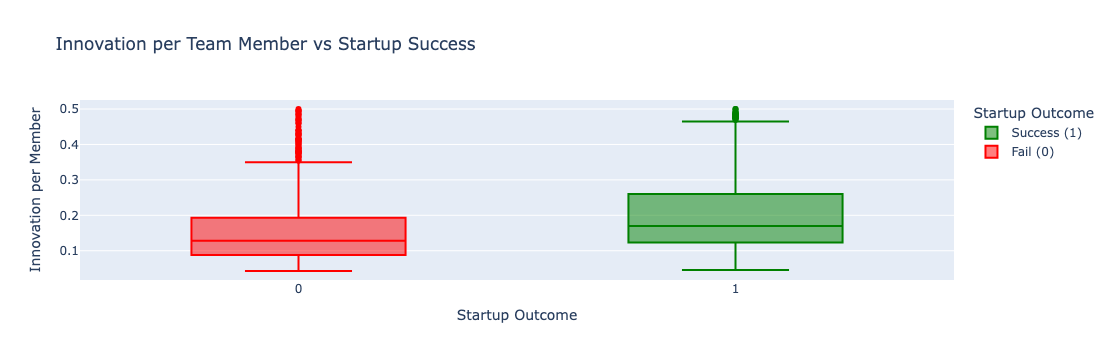

In [68]:
# Innovation per Team Member vs Startup Success.
fig5 = px.box(df, x='success_label', y='innovation_per_member',
             color='success_label',
             title='Innovation per Team Member vs Startup Success',
             labels={'success_label': 'Startup Outcome', 'innovation_per_member': 'Innovation per Member'},
             color_discrete_map={0: 'red', 1: 'green'})
fig5.for_each_trace(lambda t: t.update(
    name='Success (1)' if t.name == '1' else 'Fail (0)',
    legendgroup='Success (1)' if t.name == '1' else 'Fail (0)'
))
fig5.show()


>**Summary:**  
Successful startups tend to exhibit slightly higher *innovation per member* compared to failed ones.  
The median innovation efficiency is greater for successful teams, suggesting that teams generating more innovative output per person are more likely to achieve success.  
However, the overlap between groups indicates that while innovation efficiency contributes, it is not the sole determinant of success.


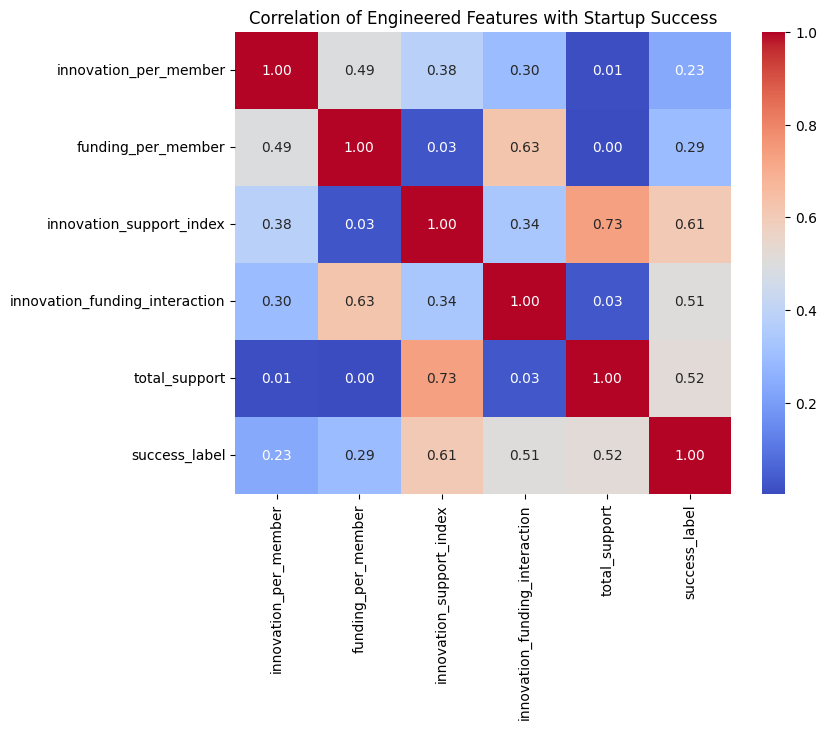

In [69]:
engineered_features = ['innovation_per_member','funding_per_member','innovation_support_index','innovation_funding_interaction','total_support']

plt.figure(figsize=(8, 6))
sns.heatmap(df[engineered_features + ['success_label']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Engineered Features with Startup Success')
plt.show()


>**Summary:**  
The correlation heatmap shows strong positive relationships between engineered features and startup success.  
Notably, *Innovation Support Index* (r = 0.61), *Total Support* (r = 0.52), and *Innovation–Funding Interaction* (r = 0.51) demonstrate the highest correlations with success.  
These relationships confirm that innovation combined with institutional backing and funding synergy plays a critical role in predicting positive outcomes.


### Next steps:
> 1. Proceeding to Model Training using both original and engineered features.
> 2. Splitting the dataset into training and test sets (80/20) for unbiased evaluation.
> 3. Appling and compare multiple machine-learning models such as Logistic Regression, Random Forest, and XGBoost.
> 4. To use key metrics — Accuracy, Precision, Recall, F1-Score, and ROC-AUC — to assess model performance.
> 5. Perform feature importance analysis to identify which factors most strongly drive startup success.

> Once the best-performing model is selected, develop an interactive Streamlit web app that allows users to input startup attributes and receive real-time success predictions.

